<a href="https://colab.research.google.com/github/arifroska/PrakAPM/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#import data
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train (1).csv


In [33]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train.csv']), encoding= 'latin-1')
df_train.head(n=10)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [34]:
training_set = df_train.iloc[:, 1:2].values

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [36]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train, = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

In [38]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [39]:
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 63s 159ms/step - loss: 0.0346
Epoch 2/100
38/38 [==============================] - 6s 143ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 8s 220ms/step - loss: 0.0062
Epoch 4/100
38/38 [==============================] - 7s 180ms/step - loss: 0.0057
Epoch 5/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 7s 193ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 9s 222ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 8s 209ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 9s 219ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0045
Epoch 13/100

In [40]:
uploaded2 = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [41]:
dataset_test = pd.read_csv(io.BytesIO(uploaded2['Google_Stock_Price_Test.csv']), encoding= 'latin-1')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [43]:
dataset_total = pd.concat((df_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

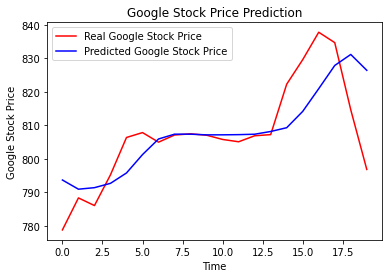

In [45]:
plt.plot(real_stock_price, color ='red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()